## **Laptop Price Prediction**

<u>Problem Statement:</u>

To predict laptop prices based on features such as brand, specifications, processor type, RAM, and storage capacity.

In [45]:
# Importing python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Loading dataset
lp = pd.read_csv("D:\Machine Learning Bootcamp\---Courses & Internships---\CodexCue\\laptopPrice.csv")
lp

brand processor_brand processor_name processor_gnrtn ram_gb ram_type  \
0      ASUS           Intel        Core i3            10th   4 GB     DDR4   
1    Lenovo           Intel        Core i3            10th   4 GB     DDR4   
2    Lenovo           Intel        Core i3            10th   4 GB     DDR4   
3      ASUS           Intel        Core i5            10th   8 GB     DDR4   
4      ASUS           Intel   Celeron Dual   Not Available   4 GB     DDR4   
..      ...             ...            ...             ...    ...      ...   
818    ASUS             AMD        Ryzen 9   Not Available   4 GB     DDR4   
819    ASUS             AMD        Ryzen 9   Not Available   4 GB     DDR4   
820    ASUS             AMD        Ryzen 9   Not Available   4 GB     DDR4   
821    ASUS             AMD        Ryzen 9   Not Available   4 GB     DDR4   
822  Lenovo             AMD        Ryzen 5            10th   8 GB     DDR4   

         ssd      hdd       os  os_bit graphic_card_gb      weight  \
0       0 GB  1024 GB  Windows  64-bit            0 GB      Casual   
1       0 GB  1024 GB  Windows  64-bit            0 GB      Casual   
2       0 GB  1024 GB  Windows  64-bit            0 GB      Casual   
3     512 GB     0 GB  Windows  32-bit            2 GB      Casual   
4       0 GB   512 GB  Windows  64-bit            0 GB      Casual   
..       ...      ...      ...     ...             ...         ...   
818  1024 GB     0 GB  Windows  64-bit            0 GB      Casual   
819  1024 GB     0 GB  Windows  64-bit            0 GB      Casual   
820  1024 GB     0 GB  Windows  64-bit            4 GB      Casual   
821  1024 GB     0 GB  Windows  64-bit            4 GB      Casual   
822   512 GB     0 GB      DOS  64-bit            0 GB  ThinNlight   

        warranty Touchscreen msoffice   Price   rating  Number of Ratings  \
0    No warranty          No       No   34649  2 stars                  3   
1    No warranty          No       No   38999  3 stars                 65   
2    No warranty          No       No   39999  3 stars                  8   
3    No warranty          No       No   69990  3 stars                  0   
4    No warranty          No       No   26990  3 stars                  0   
..           ...         ...      ...     ...      ...                ...   
818       1 year          No       No  135990  3 stars                  0   
819       1 year          No       No  144990  3 stars                  0   
820       1 year          No       No  149990  3 stars                  0   
821       1 year          No       No  142990  3 stars                  0   
822  No warranty          No       No   57490  4 stars                 18   

     Number of Reviews  
0                    0  
1                    5  
2                    1  
3                    0  
4                    0  
..                 ...  
818                  0  
819                  0  
820                  0  
821                  0  
822                  4  

[823 rows x 19 columns]

**Data Preprocessing**

In [5]:
# Checking for number of rows and columns
lp.shape

(823, 19)

In [6]:
# Checking Dataset features
lp.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

In [7]:
# Checking for dataset information
lp.info

<bound method DataFrame.info of       brand processor_brand processor_name processor_gnrtn ram_gb ram_type  \
0      ASUS           Intel        Core i3            10th   4 GB     DDR4   
1    Lenovo           Intel        Core i3            10th   4 GB     DDR4   
2    Lenovo           Intel        Core i3            10th   4 GB     DDR4   
3      ASUS           Intel        Core i5            10th   8 GB     DDR4   
4      ASUS           Intel   Celeron Dual   Not Available   4 GB     DDR4   
..      ...             ...            ...             ...    ...      ...   
818    ASUS             AMD        Ryzen 9   Not Available   4 GB     DDR4   
819    ASUS             AMD        Ryzen 9   Not Available   4 GB     DDR4   
820    ASUS             AMD        Ryzen 9   Not Available   4 GB     DDR4   
821    ASUS             AMD        Ryzen 9   Not Available   4 GB     DDR4   
822  Lenovo             AMD        Ryzen 5            10th   8 GB     DDR4   

         ssd      hdd       os 

In [8]:
# Checking for dataset description
lp.describe

<bound method NDFrame.describe of       brand processor_brand processor_name processor_gnrtn ram_gb ram_type  \
0      ASUS           Intel        Core i3            10th   4 GB     DDR4   
1    Lenovo           Intel        Core i3            10th   4 GB     DDR4   
2    Lenovo           Intel        Core i3            10th   4 GB     DDR4   
3      ASUS           Intel        Core i5            10th   8 GB     DDR4   
4      ASUS           Intel   Celeron Dual   Not Available   4 GB     DDR4   
..      ...             ...            ...             ...    ...      ...   
818    ASUS             AMD        Ryzen 9   Not Available   4 GB     DDR4   
819    ASUS             AMD        Ryzen 9   Not Available   4 GB     DDR4   
820    ASUS             AMD        Ryzen 9   Not Available   4 GB     DDR4   
821    ASUS             AMD        Ryzen 9   Not Available   4 GB     DDR4   
822  Lenovo             AMD        Ryzen 5            10th   8 GB     DDR4   

         ssd      hdd       o

In [9]:
# Checking for null values
lp.isnull()

brand  processor_brand  processor_name  processor_gnrtn  ram_gb  \
0    False            False           False            False   False   
1    False            False           False            False   False   
2    False            False           False            False   False   
3    False            False           False            False   False   
4    False            False           False            False   False   
..     ...              ...             ...              ...     ...   
818  False            False           False            False   False   
819  False            False           False            False   False   
820  False            False           False            False   False   
821  False            False           False            False   False   
822  False            False           False            False   False   

     ram_type    ssd    hdd     os  os_bit  graphic_card_gb  weight  warranty  \
0       False  False  False  False   False            False   False     False   
1       False  False  False  False   False            False   False     False   
2       False  False  False  False   False            False   False     False   
3       False  False  False  False   False            False   False     False   
4       False  False  False  False   False            False   False     False   
..        ...    ...    ...    ...     ...              ...     ...       ...   
818     False  False  False  False   False            False   False     False   
819     False  False  False  False   False            False   False     False   
820     False  False  False  False   False            False   False     False   
821     False  False  False  False   False            False   False     False   
822     False  False  False  False   False            False   False     False   

     Touchscreen  msoffice  Price  rating  Number of Ratings  \
0          False     False  False   False              False   
1          False     False  False   False              False   
2          False     False  False   False              False   
3          False     False  False   False              False   
4          False     False  False   False              False   
..           ...       ...    ...     ...                ...   
818        False     False  False   False              False   
819        False     False  False   False              False   
820        False     False  False   False              False   
821        False     False  False   False              False   
822        False     False  False   False              False   

     Number of Reviews  
0                False  
1                False  
2                False  
3                False  
4                False  
..                 ...  
818              False  
819              False  
820              False  
821              False  
822              False  

[823 rows x 19 columns]

In [10]:
# Checking for null values counts
lp.isnull().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

In [11]:
# Remove unnecessary columns
data = lp.drop(columns=['Number of Ratings', 'Number of Reviews'])

In [14]:
# Convert categorical variables into dummy/indicator variables
lp = pd.get_dummies(lp)
lp

Price  brand_APPLE  brand_ASUS  brand_Avita  brand_DELL  brand_HP  \
0     34649        False        True        False       False     False   
1     38999        False       False        False       False     False   
2     39999        False       False        False       False     False   
3     69990        False        True        False       False     False   
4     26990        False        True        False       False     False   
..      ...          ...         ...          ...         ...       ...   
818  135990        False        True        False       False     False   
819  144990        False        True        False       False     False   
820  149990        False        True        False       False     False   
821  142990        False        True        False       False     False   
822   57490        False       False        False       False     False   

     brand_Lenovo  brand_MSI  brand_acer  processor_brand_AMD  ...  \
0           False      False       False                False  ...   
1            True      False       False                False  ...   
2            True      False       False                False  ...   
3           False      False       False                False  ...   
4           False      False       False                False  ...   
..            ...        ...         ...                  ...  ...   
818         False      False       False                 True  ...   
819         False      False       False                 True  ...   
820         False      False       False                 True  ...   
821         False      False       False                 True  ...   
822          True      False       False                 True  ...   

     warranty_No warranty  Touchscreen_No  Touchscreen_Yes  msoffice_No  \
0                    True            True            False         True   
1                    True            True            False         True   
2                    True            True            False         True   
3                    True            True            False         True   
4                    True            True            False         True   
..                    ...             ...              ...          ...   
818                 False            True            False         True   
819                 False            True            False         True   
820                 False            True            False         True   
821                 False            True            False         True   
822                  True            True            False         True   

     msoffice_Yes  rating_1 star  rating_2 stars  rating_3 stars  \
0           False          False            True           False   
1           False          False           False            True   
2           False          False           False            True   
3           False          False           False            True   
4           False          False           False            True   
..            ...            ...             ...             ...   
818         False          False           False            True   
819         False          False           False            True   
820         False          False           False            True   
821         False          False           False            True   
822         False          False           False           False   

     rating_4 stars  rating_5 stars  
0             False           False  
1             False           False  
2             False           False  
3             False           False  
4             False           False  
..              ...             ...  
818           False           False  
819           False           False  
820           False           False  
821           False           False  
822            True           False  

[823 rows x 78 columns]

**Exploratory Data Analysis**

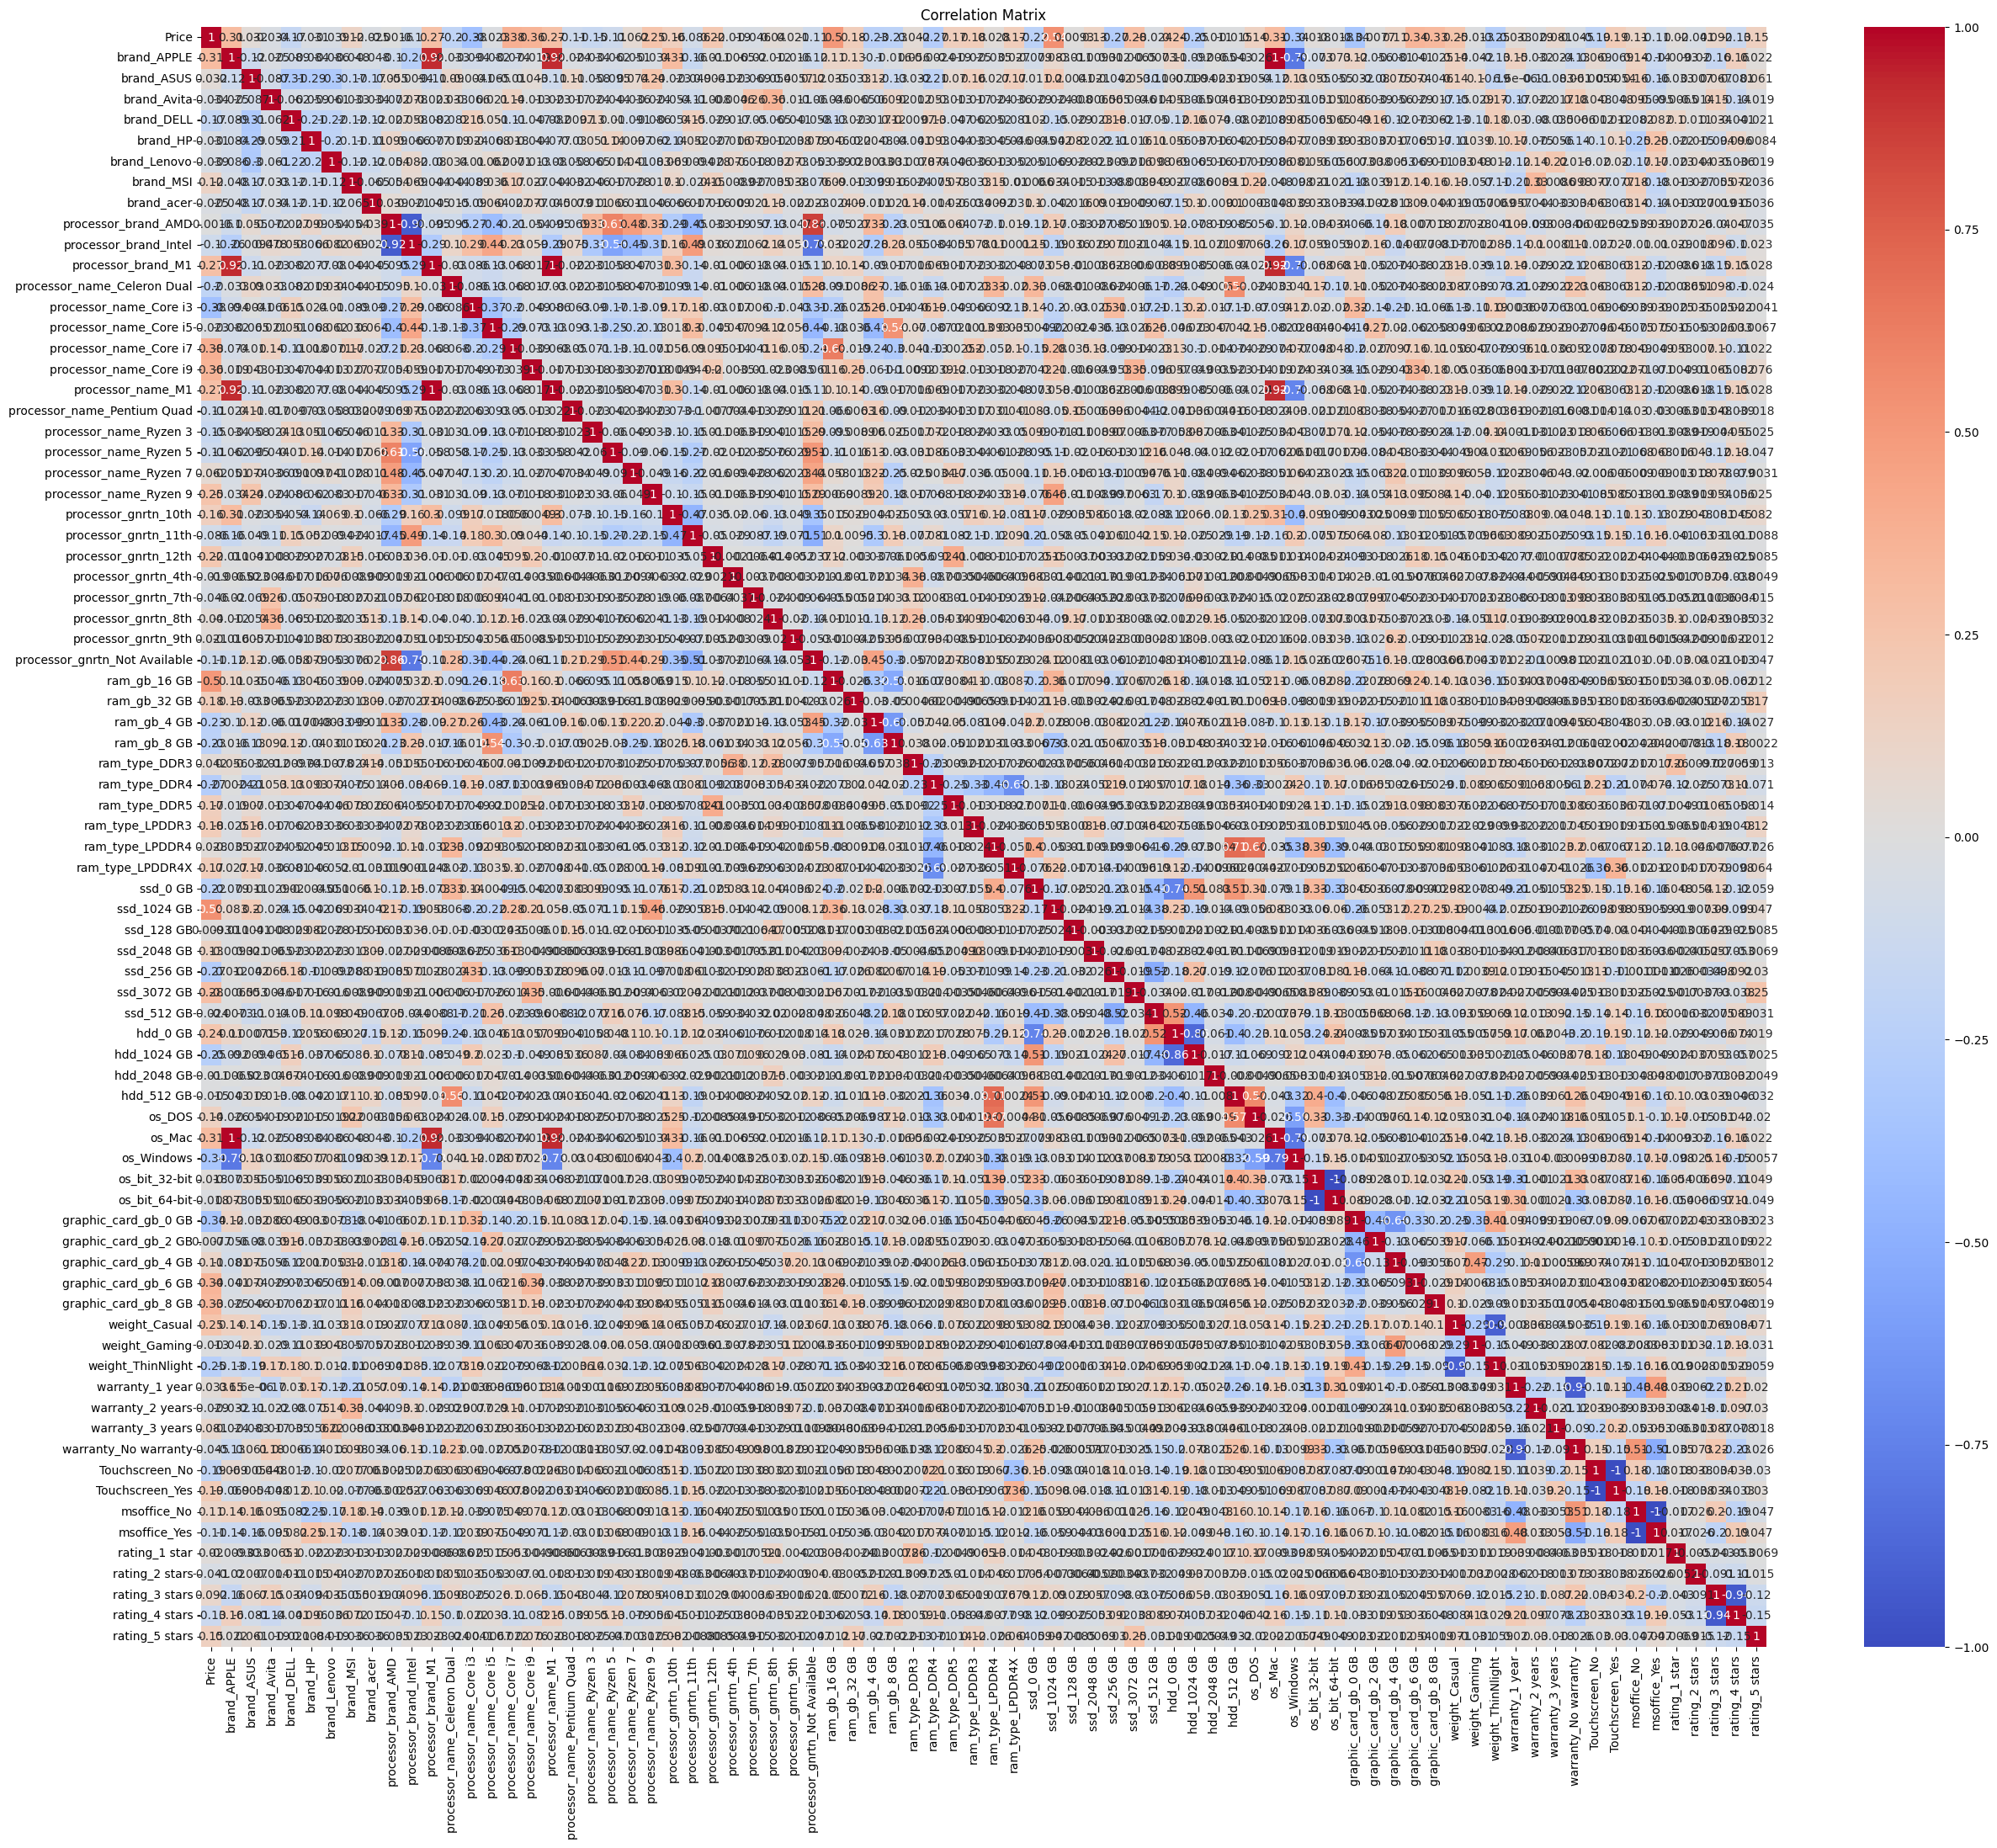

In [18]:
# Correlation Matrix
correlation_matrix = lp.corr()
plt.figure(figsize=(30, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

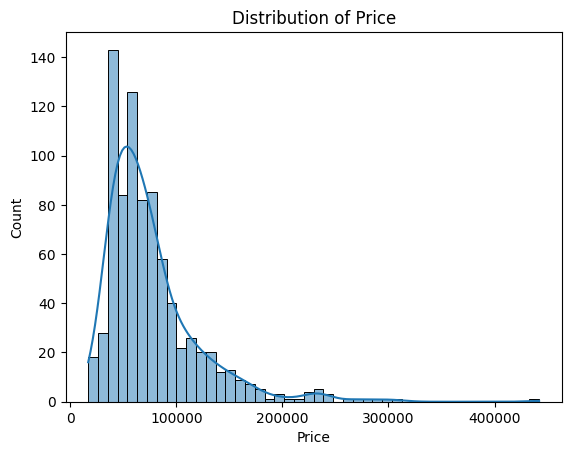

In [ ]:
# Visualize the distribution of target variable
sns.histplot(lp['Price'], kde=True)
plt.title('Distribution of Price')
plt.show()

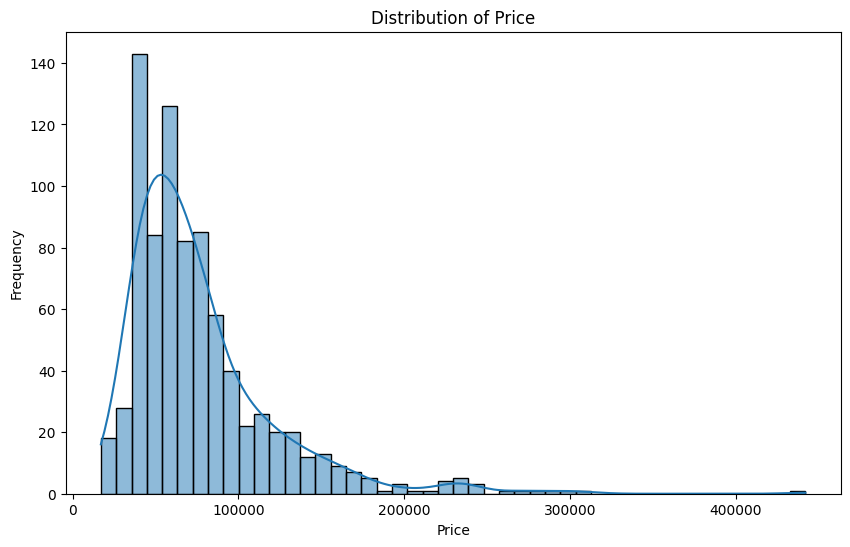

In [22]:
# Visualize the distribution of target variable
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

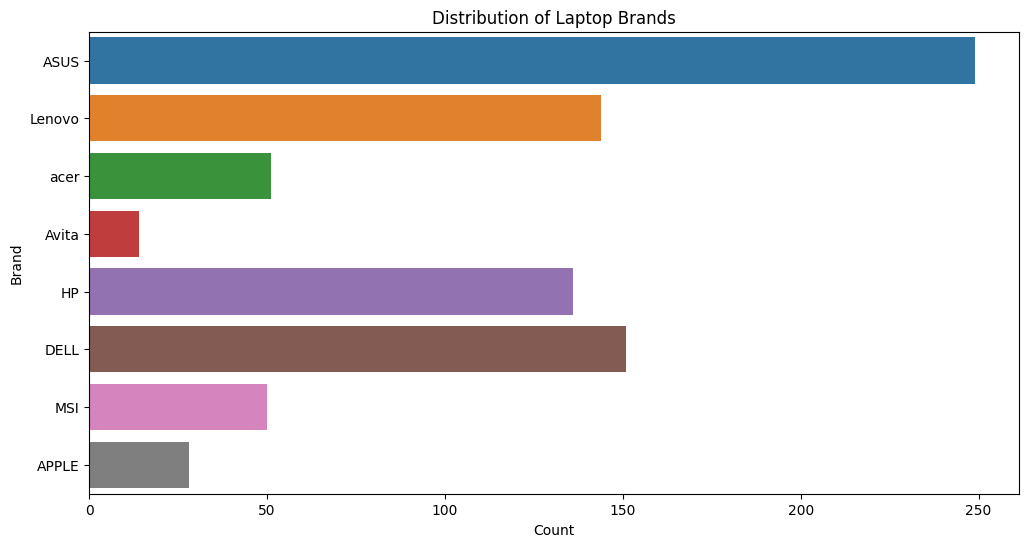

In [23]:
# Visualize the distribution of brands
plt.figure(figsize=(12, 6))
sns.countplot(y='brand', data=data)
plt.title('Distribution of Laptop Brands')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.show()

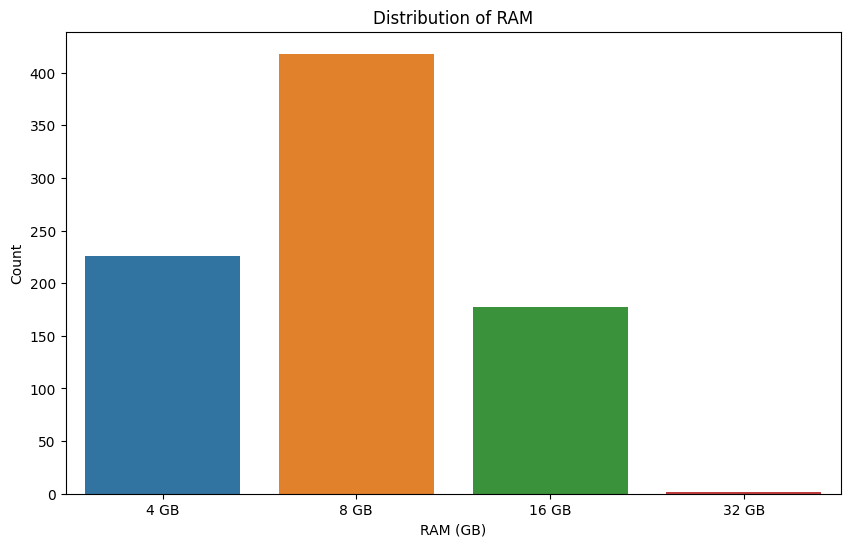

In [24]:
# Visualize the distribution of RAM
plt.figure(figsize=(10, 6))
sns.countplot(x='ram_gb', data=data)
plt.title('Distribution of RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Count')
plt.show()

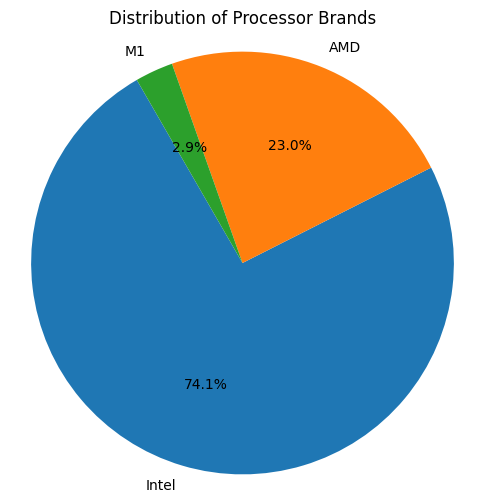

In [29]:
# Visualize the distribution of Processor Brands using a pie chart
plt.figure(figsize=(6, 6))
processor_counts = data['processor_brand'].value_counts()
plt.pie(processor_counts, labels=processor_counts.index, autopct='%1.1f%%', startangle=120)
plt.title('Distribution of Processor Brands')
plt.axis('equal')
plt.show()

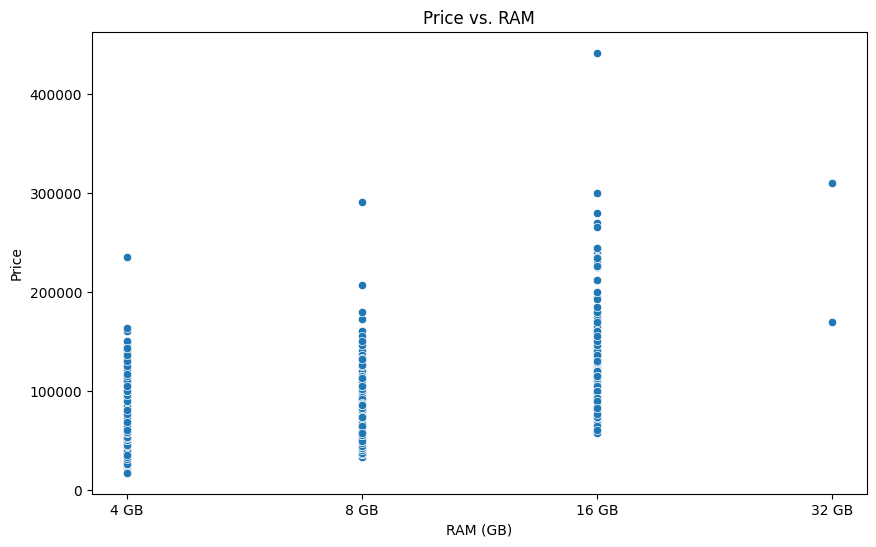

In [30]:
# Scatter plots to visualize relationships between features and the target variable

# Price vs. RAM
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ram_gb', y='Price', data=data)
plt.title('Price vs. RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Price')
plt.show()

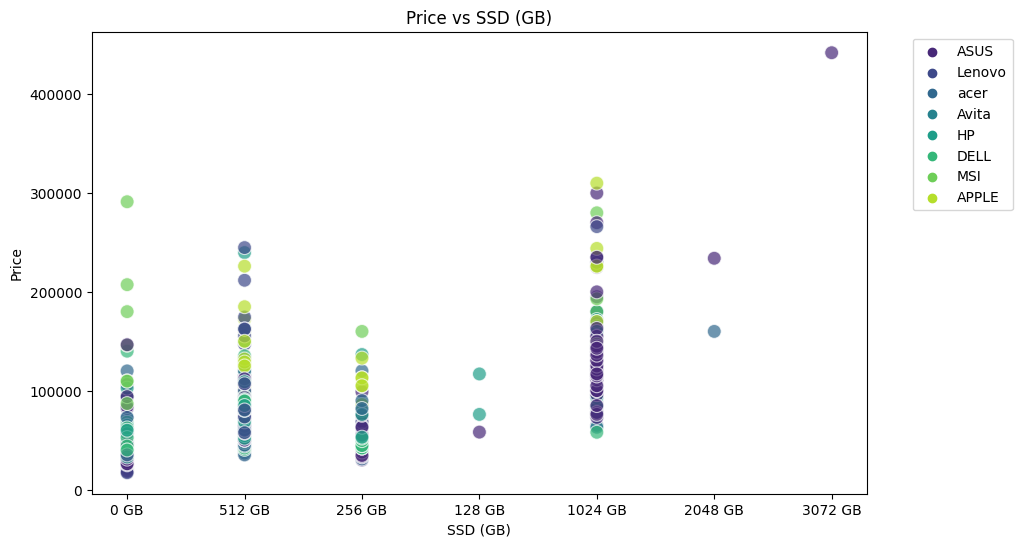

In [33]:
# Price vs. SSD(GB)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ssd', y='Price', data=data, hue='brand', palette='viridis', s=100, alpha=0.7)
plt.title('Price vs SSD (GB)')
plt.xlabel('SSD (GB)')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

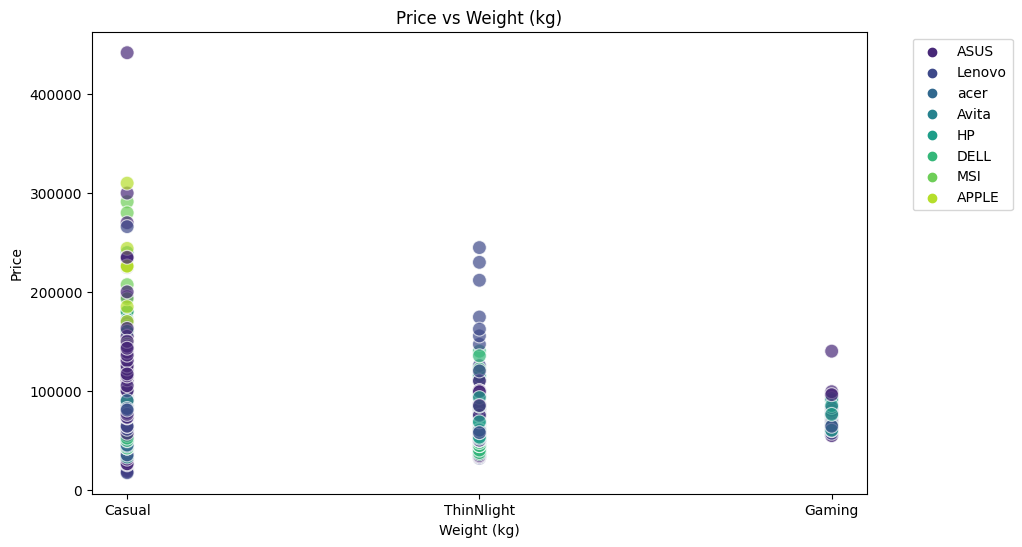

In [34]:
# Price vs Weight
plt.figure(figsize=(10, 6))
sns.scatterplot(x='weight', y='Price', data=data, hue='brand', palette='viridis', s=100, alpha=0.7)
plt.title('Price vs Weight (kg)')
plt.xlabel('Weight (kg)')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Model Building**

In [37]:
#Data Splitting
X = lp.drop(columns=['Price'])
y = lp['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
#Model Building (Gradient Boosting Regression)
gb_regressor = GradientBoostingRegressor()

In [39]:
# Model fitting
gb_regressor.fit(X_train, y_train)

GradientBoostingRegressor()

**Model Evaluation**

In [42]:
# Finding prediction for train sets
y_pred_train = gb_regressor.predict(X_train)
y_pred_train

array([ 77444.39693163,  54050.11067792,  76738.36675436,  65044.24951265,
        71794.36031025,  91857.02553192,  39937.6574572 ,  38185.99042564,
        87702.995571  ,  67608.16800003,  39548.48930421,  74234.48620166,
        98099.1444064 ,  65261.36115584, 106454.42845005,  40310.24885985,
        69963.13945666,  77085.02446688,  86829.63279069,  43337.86228821,
        59835.94387212, 222794.59524159,  69963.13945666, 135393.40572084,
        64382.18774603,  77004.62765926,  74234.48620166, 127751.53917844,
        42089.73590516, 254866.9595541 ,  87326.39234117, 123223.64869503,
        89482.60056299,  64917.86053219,  75808.57775268,  68557.82158489,
        97177.06006419,  81226.8404773 , 112604.79432507,  89976.46573023,
        43623.85296665,  61931.74332538,  44856.57996943,  36359.4053746 ,
        46082.88671385,  39976.47871965,  47976.29378821,  42986.63886107,
        60246.20673586,  37643.14843098,  39937.6574572 ,  42609.40728845,
        60246.20673586,  

In [43]:
# Finding prediction for test sets
y_pred_test = gb_regressor.predict(X_test)
y_pred_test

array([119889.28825793,  39365.77586864,  39244.00191274,  39608.10096986,
        74634.73803862,  74634.73803862, 133384.25304058,  41864.35417808,
        54050.11067792,  54050.11067792, 140467.78885208,  77444.39693163,
        93568.52137478,  57589.15738412,  57341.5553718 ,  49459.92272434,
        40516.89110042,  62564.01058364,  59289.86491214,  98999.44691474,
        94912.97386803,  76534.76510438,  77831.44437418,  67608.16800003,
        79624.08545652,  60327.6725786 ,  59713.02962535,  60246.20673586,
        39977.4517376 ,  38336.80397544,  77958.84891713,  73834.37831804,
        62564.01058364,  39558.62324872,  66220.01225322, 195127.6107924 ,
        60017.69512259,  44154.43207944,  90513.50475904,  37666.31904235,
        62200.20178082,  44774.96819843,  66094.66080827, 121470.83918748,
        67608.16800003,  39976.47871965,  60246.20673586,  54050.11067792,
        39365.77586864,  80662.9643703 , 120660.26765136, 150029.20823977,
        74634.73803862, 1

In [44]:
# Calculate Mean Squared Error
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("Mean Squared Error (Train):", mse_train)
print("Mean Squared Error (Test):", mse_test)

Mean Squared Error (Train): 185211795.25899833
Mean Squared Error (Test): 755277483.1518745


In [47]:
# Calculate R² score
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("R² Score (Train):", r2_train)
print("R² Score (Test):", r2_test)

R² Score (Train): 0.9097522151907333
R² Score (Test): 0.6124410943134485
